=== Retail Sales Analyzer ===


Enter your CSV file name : retail_sales.csv


File loaded successfully!

 Dataset Summary:
             Price  Quantity Sold   Total Sales
count   100.000000     100.000000    100.000000
mean    721.248300       5.180000   3738.910900
std     449.337233       2.750133   3377.134866
min      23.490000       1.000000     41.570000
25%     337.457500       3.000000    963.845000
50%     753.775000       5.000000   2415.925000
75%    1126.210000       7.000000   5906.590000
max    1455.850000      10.000000  13251.500000

Columns: ['Date', 'Product', 'Category', 'Price', 'Quantity Sold', 'Total Sales']

 **** Sales Metrics: ****
Total Sales: ₹373,891.09
Average Sales: ₹3,738.91
Most Popular Product: Sneakers
          Date     Product     Category    Price  Quantity Sold  Total Sales
10  2025-07-13      Laptop  Electronics  1248.12              8      9984.96
14  2025-08-28  Headphones  Electronics   556.14              3      1668.42
15  2025-02-26      Laptop  Electronics  1393.02              5      6965.10
16  2025-09-23      Lapt

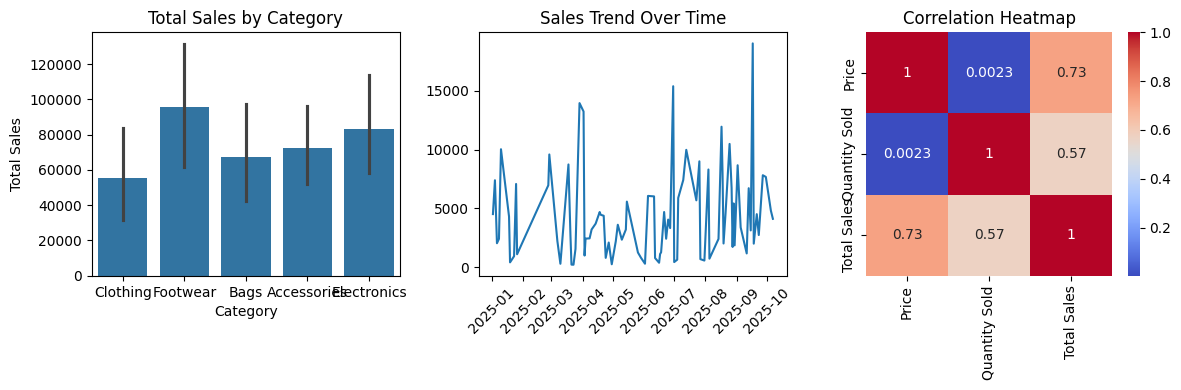

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class RetailAnalyzer:
    def __init__(self):
        self.data = None
        
    def load_data(self, file_path):
        if not file_path.endswith(".csv"):
            print("Please upload a CSV file.")
            return
        try:
            self.data = pd.read_csv(file_path)
            print("File loaded successfully!")
         
            if self.data.isnull().any().any():
                print(" Missing values found! Filling with 0...")
                self.data.fillna(0, inplace=True)
        except Exception as e:
            print("Error loading file:", e)
            
    def calculate_metrics(self):
        if self.data is None:
            print("No data load")
            return
            
        total_sales = self.data["Total Sales"].sum()
        avg_sales = self.data["Total Sales"].mean()
        popular_product = self.data["Product"].mode()[0]

        print("\n **** Sales Metrics: ****")
        print(f"Total Sales: ₹{total_sales:,.2f}")
        print(f"Average Sales: ₹{avg_sales:,.2f}")
        print(f"Most Popular Product: {popular_product}")

    def filter_data(self, category=None, start_date=None, end_date=None):
        if self.data is None: 
            print("No data loaded!")
            return None
    
        filtered = self.data.copy()

        if category:
            filtered = filtered[filtered["Category"] == category]
        print(filtered)
        return filtered

    def display_summary(self):
        if self.data is None:
            print("No data loaded!")
            return
        print("\n Dataset Summary:")
        print(self.data.describe())
        print("\nColumns:", list(self.data.columns))

    def visualize(self):
        if self.data is None:
            print("No data loaded!")
            return

        plt.figure(figsize=(12, 4))

        # Bar chart
        plt.subplot(1, 3, 1)
        sns.barplot(data=self.data, x="Category", y="Total Sales", estimator=sum)
        plt.title("Total Sales by Category")

        # Line chart
        plt.subplot(1, 3, 2)
        self.data["Date"] = pd.to_datetime(self.data["Date"])
        trend = self.data.groupby("Date")["Total Sales"].sum().reset_index()
        plt.plot(trend["Date"], trend["Total Sales"])
        plt.title("Sales Trend Over Time")
        plt.xticks(rotation=45)

        plt.subplot(1, 3, 3)
        sns.heatmap(self.data[["Price", "Quantity Sold", "Total Sales"]].corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")

        plt.tight_layout()
        plt.show()

def main():
    print("=== Retail Sales Analyzer ===")
    file = input("Enter your CSV file name :")

    analyzer = RetailAnalyzer()
    analyzer.load_data(file)
    analyzer.display_summary()
    analyzer.calculate_metrics()

    analyzer.filter_data(category="Electronics")
    analyzer.visualize()

if __name__ == "__main__":
    main()
